# Global config

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from cycler import cycler
from matplotlib import patches, ticker
import matplotlib.colors as mcolors

In [3]:
# Reload all modules (except those excluded by %aimport) every time before executing the Python code typed.
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [4]:
# Run this to close all figures*
plt.close("all")

In [5]:
## Global configuration

# constrained_layout automatically adjusts subplots and decorations like legends and colorbars
# so that they fit in the figure window while still preserving, as best they can, the logical
# layout requested by the user. constrained_layout is similar to tight_layout, but uses a constraint
# solver to determine the size of axes that allows them to fit.

linestyle_str = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple = [
     ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),
     ('long dash with offset', (5, (10, 3))),
     ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

     ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]

# ['#3853a4', '#146533', '#ed1f24', '#708191', '#faa51a', '#b9519f']
# ['#F27970', '#BB9727',  '#54B345', '#32B897', '#05B9E2', '#8983BF']
palette = ['#EE6677', '#4477AA', '#8ECFC9', '#FFBE7A', '#BEB8DC', '#E7DAD2']
patterns = ["", "/" , "\\" , "x", ".", "o"] #  "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1, 1, 1)), (5, (10, 3))]
markers = ['v', '*', '.', 's', '1', 'x']

plt.rcParams["figure.constrained_layout.use"] = True

plt.rcParams['figure.figsize'] = [4.0, 3.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100

plt.rcParams['font.size'] = 18
plt.rcParams["font.family"] = "Arial"
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'white'
plt.rcParams['legend.framealpha'] = 0.9
plt.rcParams['figure.titlesize'] = 'medium'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

plt.rcParams['axes.prop_cycle'] = cycler(color=palette) + cycler(linestyle=linestyles)

In [6]:
transparency = 0.5

def get_transparent_color(color):
    c = mcolors.hex2color(color)
    c = tuple(map(lambda x: x*transparency + (1.0-transparency), mcolors.hex2color(c)))
    hex_color = '#{:02X}{:02X}{:02X}'.format(int(c[0] * 255), int(c[1] * 255), int(c[2] * 255))
    return hex_color

# `colors` for border lines and `colors_fill` for filled areas
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
colors_fill = list(map(get_transparent_color, colors))

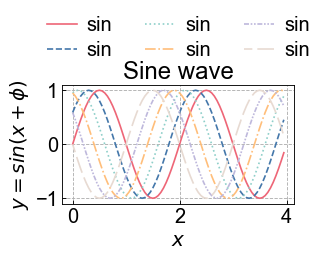

In [14]:
x = np.arange(0, 4, 0.05)

fig, ax = plt.subplots()
fig.set_size_inches((4, 3))

ax.plot(x, np.sin(x*np.pi), label='sin')
ax.plot(x, np.sin((x+0.2)*np.pi), label='sin')
ax.plot(x, np.sin((x+0.4)*np.pi), label='sin')
ax.plot(x, np.sin((x+0.6)*np.pi), label='sin')
ax.plot(x, np.sin((x+0.8)*np.pi), label='sin')
ax.plot(x, np.sin((x+1.0)*np.pi), label='sin')

ax.set_xlabel('$x$')
ax.set_ylabel('$y = sin(x + \phi)$')
ax.set_title('Sine wave')

ax.grid(True)

ax.legend(loc='upper center', frameon=False, bbox_to_anchor=(-0.1, 1.5, 1.2, 0.15),
          ncol=6 / 2, borderaxespad=0, handlelength=1.5, mode="expand",
          handletextpad=0.5, columnspacing=1, labelspacing=0.3)

plt.savefig('figure/hello.pdf')

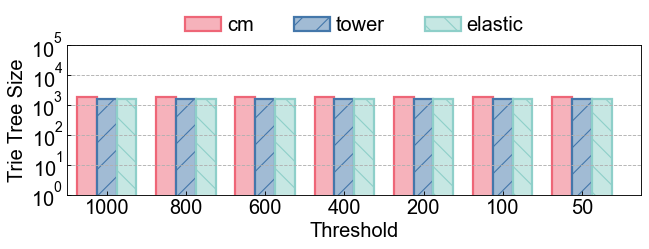

In [14]:
df = pd.read_csv('data/switch_sort.csv')

fig, ax = plt.subplots()
fig.set_size_inches((8, 3))
bar_width = 1

gen = 'zipf'
sketches = ['cm', 'tower', 'elastic']
thresholds = [1000, 800, 600, 400, 200, 100, 50]
width = 500
n = 33554432


baseline_time = df[(df['method'] == 'baseline') & (df['generator'] == gen)]['time'].mean()

for i, sketch in enumerate(sketches):
    x = i + np.arange(len(thresholds)) * 4
    y_df = df[(df['method'] == sketches[i]) & (df['generator'] == gen) & (df['width'] == width)]
    # y = baseline_time / np.array(y_df['time'])
    # y = np.array(y_df['leaf']) / np.array(y_df['node'])
    # y = np.array(y_df['buffer']) / n
    y = np.array(y_df['node'])
    
    bar_plot = ax.bar(x, y, width=bar_width, label=sketch, edgecolor=colors[i], hatch=patterns[i], facecolor=colors_fill[i], linewidth=2)

ax.set_xticks( np.arange(len(thresholds)) * 4 + 1, thresholds )
ax.set_yscale('log')
ax.set_yticks([10 ** i for i in range(0, 6)])
ax.set_xlim(-1, len(thresholds) * 4)
# ax.set_ylim(0.9, 1 + 0.01)

ax.legend(bbox_to_anchor=(-0.05, 1.1, 1.1, 0.15), loc='upper center', frameon=False,
          ncol=3, borderaxespad=0, handlelength=1.8, handletextpad=0.3)

ax.set_xlabel("Threshold")
# ax.set_ylabel("Accelation Ratio")
# ax.set_ylabel("Trie Tree Utilization")
# ax.set_ylabel("Buffer Occupancy")
ax.set_ylabel("Trie Tree Size")

ax.grid(axis='y')

plt.savefig(f'figure/{gen}-{width}-node.pdf')


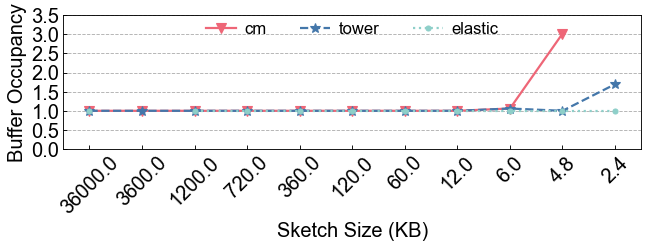

In [13]:
df = pd.read_csv('data/switch_sort.csv', header=0)

gen = 'zipf'
sketches = ['cm', 'tower', 'elastic']
xline = [3000000, 300000, 100000, 60000, 30000, 10000, 5000, 1000, 500, 400, 200]
n = 33554432

ylines = []

for i, sketch in enumerate(sketches):
    y = []
    for width in xline:
        buffer_size = df[(df['method'] == sketch) & (df['generator'] == gen) & (df['width'] == width)]['buffer'].max()
        y.append(buffer_size / n)
    ylines.append(y)

fig, ax = plt.subplots()
fig.set_size_inches((8, 3))

for i in range(len(sketches)):
    ax.plot(np.arange(len(xline)), ylines[i], label=sketches[i], linewidth=2, 
            marker=markers[i], markersize=9, markevery=1)

# ax.set_xlim(15, 18)
# ax.set_ylim(0, 1800)
ax.set_xticks(np.arange(len(xline)))
ax.set_xticklabels(np.array(xline) * 3 * 4 / 1000, rotation=45)
ax.set_yticks(np.arange(0, 4, 0.5))
ax.set_xlabel('Sketch Size (KB)')
ax.set_ylabel('Buffer Occupancy')

ax.grid(True, axis='y')

ax.legend(loc='upper center', frameon=False,
          ncol=3, borderaxespad=0, handlelength=1.8, 
          handletextpad=0.5, columnspacing=2.0, fontsize="small")

plt.savefig(f'figure/{gen}-mem.pdf')